In [ ]:
import pandas as pd

# Sample DataFrame creation
data = {
    'x': [20, 40, 50, 60, 80, 100, 30, 45, 85],
    'y': [0.1, 3.5, 0.4, 5.6, 0.3, 4.9, 0.2, 4.5, 0.1]
}
df = pd.DataFrame(data)

# Calculate the condition
condition1 = (df['x'] >= 30) & (df['x'] <= 90)  # x in range 30 to 90
condition2 = (df['y'] < 0.5) & (df['y'].shift(1) < 5)  # y < 0.5 and previous day's y < 5

# Apply conditions and set 'z' to 1 where conditions are met
df['z'] = 0  # Initialize column 'z' with 0
df.loc[condition1 & condition2, 'z'] = 1  # Set 'z' to 1 where conditions are met

print(df)


NameError: name 'ax1' is not defined

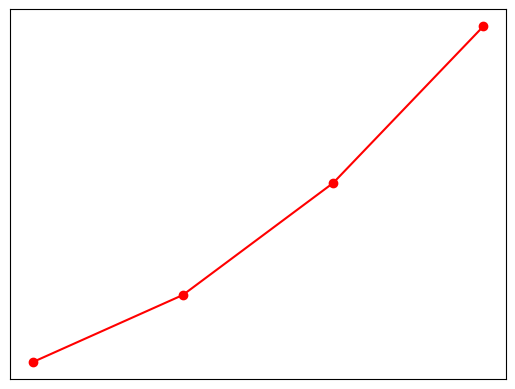

In [2]:
import matplotlib.pyplot as plt

# Create a figure and an axes
fig, ax = plt.subplots()

# Set the background color to white
ax.set_facecolor('white')

# Hide all ticks
ax.set_xticks([])  # Hide x-axis ticks
ax.set_yticks([])  # Hide y-axis ticks

# Optionally, if you want to ensure the frame (spine) visibility:
for spine in ax.spines.values():
    spine.set_visible(True)

# Example plot data
ax.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro-')  # Red dots with line

# Show the plot
# plt.show()


ax.patch.set_alpha(1)  # Fully opaque

# Adjust z-order to ensure ax2 is on top
ax.set_zorder(ax1.get_zorder() + 1)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
data = np.random.rand(10,10)

fig, ax = plt.subplots()
cax = fig.add_axes([0.85, 0.1, 0.05, 0.8])  # [left, bottom, width, height] in figure coordinate

# Plotting
image = ax.imshow(data, cmap='hot')
fig.colorbar(image, cax=cax)  # Specify the axes for the colorbar

plt.show()


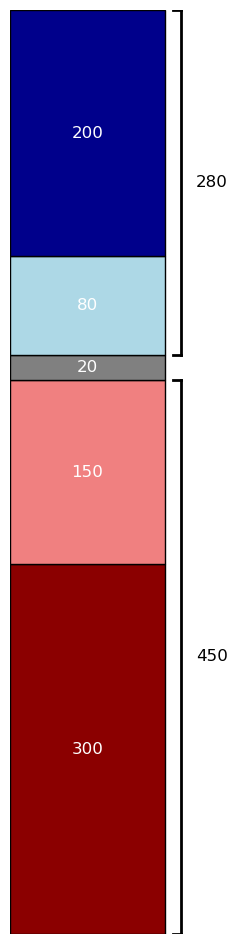

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch

# Dane wejściowe
wartosci = [300, 150, 20, 80, 200]
kolory = ['darkred', 'lightcoral', 'grey', 'lightblue', 'darkblue']
etykiety = [str(w) for w in wartosci]

# Obliczenia proporcji i wysokości segmentów
suma_wartosci = sum(wartosci)
wysokosci = [ (w / suma_wartosci) * 6 for w in wartosci ]  # wysokości w cm

# Obliczenie pozycji dolnych segmentów
pozycje_dolne = [0]
for h in wysokosci[:-1]:
    pozycje_dolne.append(pozycje_dolne[-1] + h)

# Sumowanie wartości dla niebieskich i czerwonych
suma_czerwone = wartosci[0] + wartosci[1]
suma_niebieskie = wartosci[3] + wartosci[4]

# Tworzenie wykresu
fig, ax = plt.subplots(figsize=(3, 12))

# Rysowanie segmentów i dodawanie etykiet
for i in range(len(wartosci)):
    rect = patches.Rectangle((0, pozycje_dolne[i]), 1, wysokosci[i], facecolor=kolory[i], edgecolor='black')
    ax.add_patch(rect)
    x = 0.5  # środek w osi x
    y = pozycje_dolne[i] + wysokosci[i]/2  # środek segmentu w osi y
    ax.text(x, y, etykiety[i], ha='center', va='center', fontsize=12, color='white')

# Dodanie klamer po prawej stronie
# Klamra dla czerwonych segmentów
ax.plot([1.1, 1.1], [pozycje_dolne[0], pozycje_dolne[1] + wysokosci[1]], color='black', lw=2)
ax.plot([1.1, 1.05], [pozycje_dolne[0], pozycje_dolne[0]], color='black', lw=2)
ax.plot([1.1, 1.05], [pozycje_dolne[1] + wysokosci[1], pozycje_dolne[1] + wysokosci[1]], color='black', lw=2)
ax.text(1.2, (pozycje_dolne[0] + pozycje_dolne[1] + wysokosci[1]) / 2, str(suma_czerwone),
        ha='left', va='center', fontsize=12, color='black')

# Klamra dla niebieskich segmentów
ax.plot([1.1, 1.1], [pozycje_dolne[3], pozycje_dolne[4] + wysokosci[4]], color='black', lw=2)
ax.plot([1.1, 1.05], [pozycje_dolne[3], pozycje_dolne[3]], color='black', lw=2)
ax.plot([1.1, 1.05], [pozycje_dolne[4] + wysokosci[4], pozycje_dolne[4] + wysokosci[4]], color='black', lw=2)
ax.text(1.2, (pozycje_dolne[3] + pozycje_dolne[4] + wysokosci[4]) / 2, str(suma_niebieskie),
        ha='left', va='center', fontsize=12, color='black')

# Ustawienia osi i wyświetlenie wykresu
ax.set_xlim(0, 1.5)
ax.set_ylim(0, 6)
ax.axis('off')

plt.show()

In [2]:
import pandas as pd

# Lista 50 stanów USA
states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
    'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
    'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
    'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
    'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
    'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
    'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'
]

# Generowanie przykładowych wartości 'electoral_votes' z przedziału 10-12, suma=514
# Aby osiągnąć sumę 514 dla 50 stanów, średnia wynosi około 10.28
# Rozpoczynamy od przydzielenia każdemu stanowi 10 głosów elektorskich
electoral_votes = [10] * 50  # Suma: 500

# Dodajemy dodatkowe 14 głosów, dodając po 1 głosie do pierwszych 14 stanów
for i in range(14):
    electoral_votes[i] += 1  # Nowa suma: 514

# Tworzymy DataFrame
df = pd.DataFrame({
    'state': states,
    'electoral_votes': electoral_votes
})

print("Przykładowy DataFrame (suma = 514):")
print(df)
print(f"\nSuma 'electoral_votes': {df['electoral_votes'].sum()}")


Przykładowy DataFrame (suma = 514):
             state  electoral_votes
0          Alabama               11
1           Alaska               11
2          Arizona               11
3         Arkansas               11
4       California               11
5         Colorado               11
6      Connecticut               11
7         Delaware               11
8          Florida               11
9          Georgia               11
10          Hawaii               11
11           Idaho               11
12        Illinois               11
13         Indiana               11
14            Iowa               10
15          Kansas               10
16        Kentucky               10
17       Louisiana               10
18           Maine               10
19        Maryland               10
20   Massachusetts               10
21        Michigan               10
22       Minnesota               10
23     Mississippi               10
24        Missouri               10
25         Montana          

In [3]:
import pandas as pd

# Zakładamy, że DataFrame 'df' został już utworzony i suma 'electoral_votes' wynosi 514

# Oblicz różnicę do dodania
cel = 538
aktualna_suma = df['electoral_votes'].sum()
roznica = cel - aktualna_suma  # 538 - 514 = 24

# Sprawdź, czy osiągalny jest cel z ograniczeniem maksymalnej zmiany +2 na wiersz
max_mozliwy_dodatek = len(df) * 2  # 50 * 2 = 100
if roznica > max_mozliwy_dodatek:
    raise ValueError("Nie można osiągnąć celu przy ograniczeniu dodawania maksymalnie 2 na wiersz.")

# Liczba wierszy, do których możemy dodać po 2
n_plus2 = roznica // 2  # 24 // 2 = 12
# Reszta, którą dodamy jako +1
n_plus1 = roznica % 2   # 24 % 2 = 0

# Losowo wybierz wiersze do dodania +2
if n_plus2 > 0:
    wiersze_plus2 = df.sample(n=n_plus2, random_state=42).index
    df.loc[wiersze_plus2, 'electoral_votes'] += 2

# Jeśli jest reszta, dodaj +1 do odpowiedniej liczby wierszy
if n_plus1 > 0:
    wiersze_plus1 = df.sample(n=n_plus1, random_state=42).index
    df.loc[wiersze_plus1, 'electoral_votes'] += 1

# Sprawdź nową sumę
nowa_suma = df['electoral_votes'].sum()
print(f"\nNowa suma 'electoral_votes': {nowa_suma}")

# Opcjonalnie: Sprawdź, czy żadna wartość nie została zmieniona o więcej niż +2
if (df['electoral_votes'] > 50).any():
    print("Uwaga: Niektóre wartości przekroczyły 50.")

# Wyświetl zmieniony DataFrame
print("\nZmieniony DataFrame:")
print(df)



Nowa suma 'electoral_votes': 538

Zmieniony DataFrame:
             state  electoral_votes
0          Alabama               11
1           Alaska               11
2          Arizona               11
3         Arkansas               11
4       California               13
5         Colorado               11
6      Connecticut               11
7         Delaware               11
8          Florida               11
9          Georgia               11
10          Hawaii               11
11           Idaho               11
12        Illinois               13
13         Indiana               13
14            Iowa               10
15          Kansas               10
16        Kentucky               10
17       Louisiana               12
18           Maine               10
19        Maryland               12
20   Massachusetts               10
21        Michigan               10
22       Minnesota               10
23     Mississippi               10
24        Missouri               10
25      